# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Data Preprocessing

**Importing the dataset**

In [4]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [6]:
df.shape

(7050, 16)

**Printing the number of missing values in each column**

In [7]:
missing=df.isna().sum()
print(missing)

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


**Droppping columns with null values**

In [8]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [9]:
len(df['status_id'].unique())

6997

In [10]:
len(df['status_published'].unique())

6913

**Droppping columns having most values as unique**

status_id and status_published have most values as unique so they can be dropped

In [11]:
df.drop(columns=['status_id','status_published'],axis=1,inplace=True)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


**Using Label Encoder for 'status_type'**

In [12]:
le = LabelEncoder()
X=df.copy()
X['status_type'] = le.fit_transform(X['status_type'])
X=X.iloc[:, :].values
y = df['status_type']
y = le.transform(y)
X

array([[  3, 529, 512, ...,   1,   1,   0],
       [  1, 150,   0, ...,   0,   0,   0],
       [  3, 227, 236, ...,   1,   0,   0],
       ...,
       [  1,   2,   0, ...,   0,   0,   0],
       [  1, 351,  12, ...,   0,   0,   0],
       [  1,  17,   0, ...,   0,   0,   0]])

# K-Means Clustering

**Finding the optimal number of clusters using elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

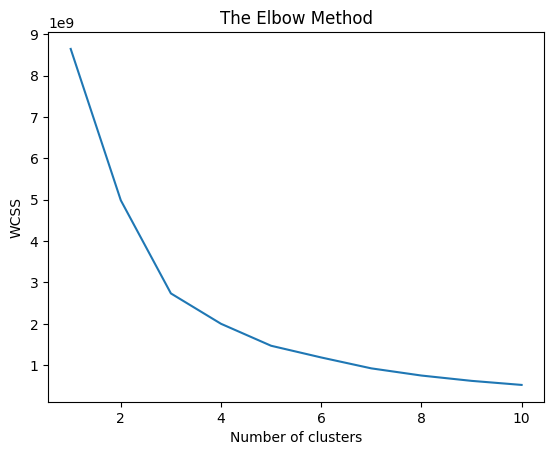

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see a knit at k=4. So the optimal number of clusters will be 4.

**Clustering using k-means**

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
df['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Plotting the clusters**

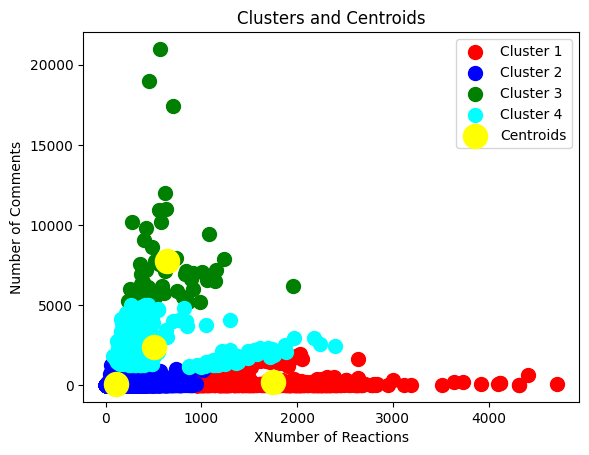

In [37]:
plt.scatter(X[df['cluster'] == 0, 1], X[df['cluster'] == 0, 2], s=100, c='red', label='Cluster 1')
plt.scatter(X[df['cluster'] == 1, 1], X[df['cluster'] == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(X[df['cluster'] == 2, 1], X[df['cluster'] == 2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(X[df['cluster'] == 3, 1], X[df['cluster'] == 3, 2], s=100, c='cyan', label='Cluster 4')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')

plt.title('Clusters and Centroids')
plt.xlabel('XNumber of Reactions')
plt.ylabel('Number of Comments')
plt.legend()
plt.show()

In [38]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.62


**Identifying majority status_type in each cluster**

In [40]:
cluster_majority_status = df.groupby('cluster')['status_type'].agg(lambda x: x.value_counts().index[0]).reset_index()

print("Majority status_type in each cluster:")
print(cluster_majority_status)

Majority status_type in each cluster:
   cluster status_type
0        0       photo
1        1       photo
2        2       video
3        3       video


# Heirarchical Clustering

**Using dendrogram to find optimal number of clusters**

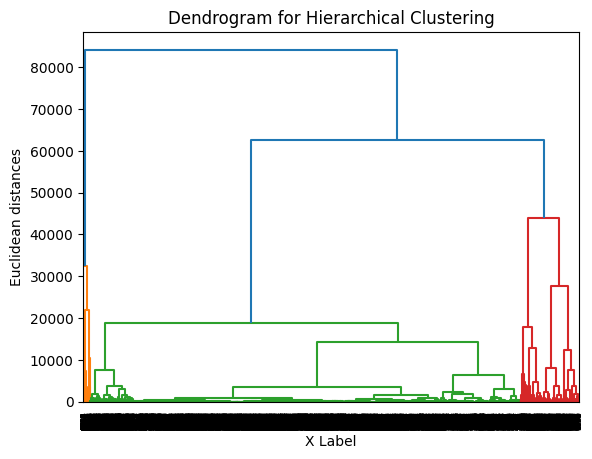

In [18]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('X Label')
plt.ylabel('Euclidean distances')
plt.show()

Keeping the threshold value as 33000,  we can see there a 4 vertical lines above. So the optimal number of clusters will be 4

**Clustering using Heirarchical clustering**

In [33]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc.fit(X)
df['cluster'] = hc.labels_

**Plotting the clusters**

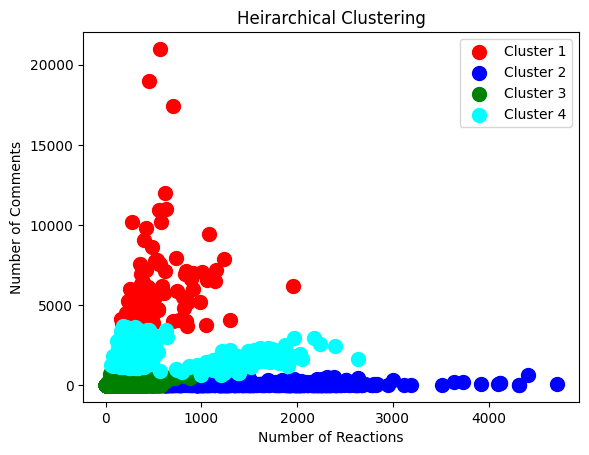

In [34]:
plt.scatter(X[df['cluster'] == 0, 1], X[df['cluster'] == 0, 2], s=100, c='red', label='Cluster 1')
plt.scatter(X[df['cluster'] == 1, 1], X[df['cluster'] == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(X[df['cluster'] == 2, 1], X[df['cluster'] == 2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(X[df['cluster'] == 3, 1], X[df['cluster'] == 3, 2], s=100, c='cyan', label='Cluster 4')
plt.title('Heirarchical Clustering')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.legend()
plt.show()

In [35]:
labels = hc.labels_

correct_labels = sum(y == labels)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.12


**Identifying majority status_type in each cluster**

In [21]:
cluster_majority_status = df.groupby('cluster')['status_type'].agg(lambda x: x.value_counts().index[0]).reset_index()

print("Majority status_type in each cluster:")
print(cluster_majority_status)

Majority status_type in each cluster:
   cluster status_type
0        0       video
1        1       photo
2        2       photo
3        3       video


# Inference

**Inference**

K-Means with k=4 has an accuracy of 62% which is very much higher when compared to heirarchical clustering which has only 12%